##**Improving Fraud Detection Accuracy in Financial Transactions using a Hybrid Model of Machine Learning Techniques**

In [27]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# **Exploratory Dataset Analysis**

In [28]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Fraud_Detection/Fraud_Detection_On_Bank_Payments.csv')
print(df.head())

   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  'es_transportation'   17.25      0  
4  'es_transportation'   35.72      0  


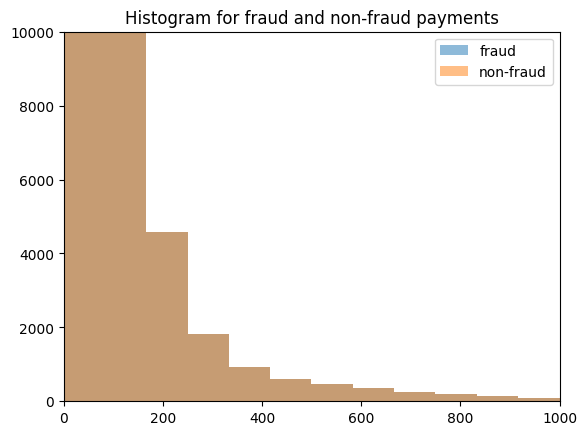

In [29]:
# Plot the distribution of the target variable

plt.hist(df.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(df.amount, alpha=0.5, label='non-fraud',bins=100)
plt.title("Histogram for fraud and non-fraud payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

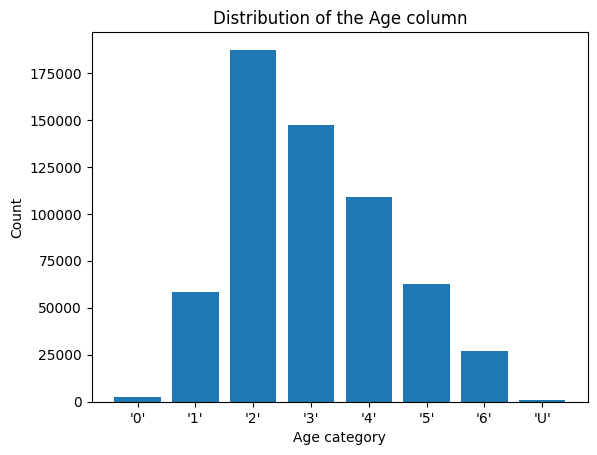

In [30]:
# Plot the distribution of the Age column

age_counts = df['age'].value_counts().sort_index()
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.xlabel('Age category')
plt.ylabel('Count')
plt.title('Distribution of the Age column')
plt.show()

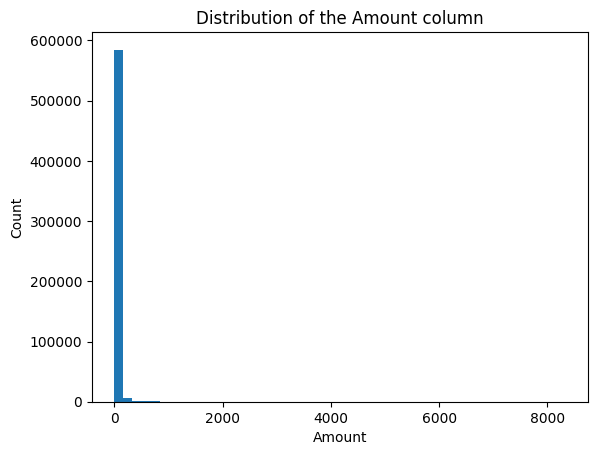

In [31]:
# Plot the distribution of the Amount column

plt.hist(df['amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of the Amount column')
plt.show()

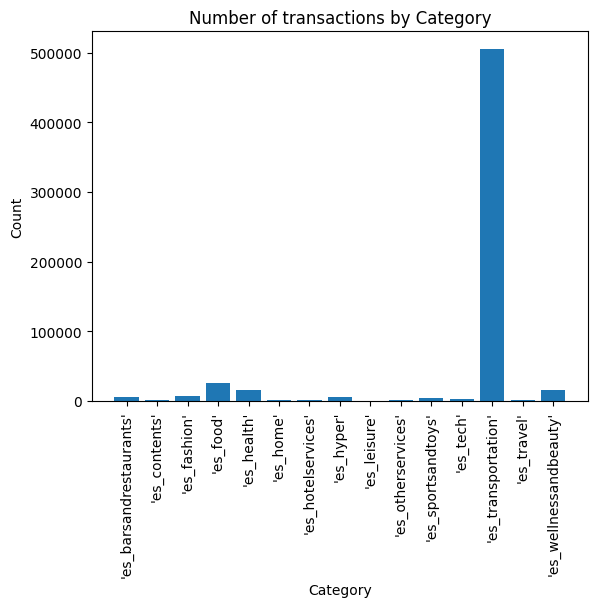

In [32]:
# Plot the number of transactions by Category

category_counts = df['category'].value_counts().sort_index()
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of transactions by Category')
plt.show()

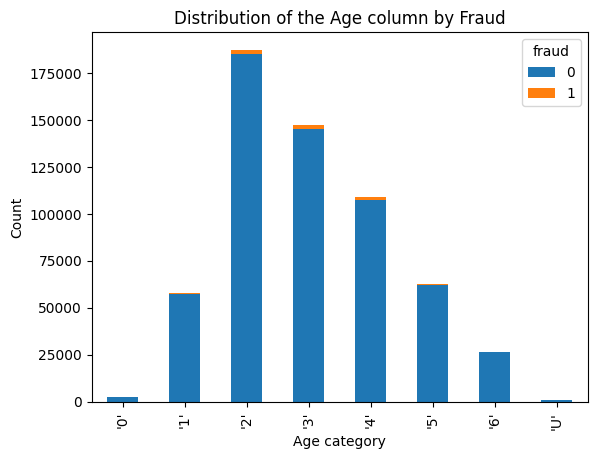

In [33]:
# Plot the distribution of the Age column by Fraud

age_fraud_counts = df.groupby(['age', 'fraud'])['age'].count().unstack('fraud').fillna(0)
age_fraud_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age category')
plt.ylabel('Count')
plt.title('Distribution of the Age column by Fraud')
plt.show()

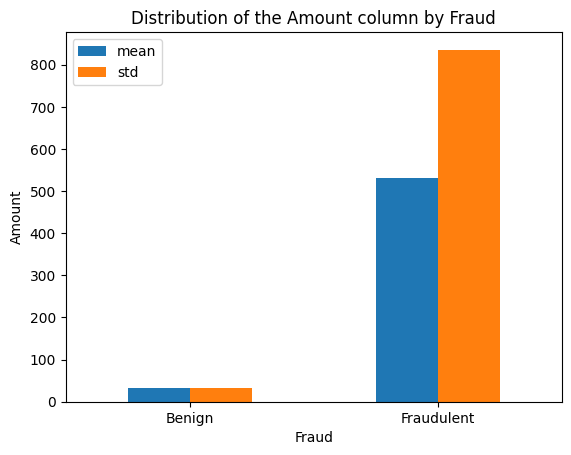

In [34]:
# Plot the distribution of the Amount column by Fraud

amount_fraud_counts = df.groupby(['fraud'])['amount'].describe()[['count', 'mean', 'std', 'min', 'max']]
amount_fraud_counts.plot(kind='bar', y=['mean', 'std'])
plt.xticks([0, 1], ['Benign', 'Fraudulent'], rotation=0)
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.title('Distribution of the Amount column by Fraud')
plt.show()

# **Data Preprocessing**

In [35]:
# Drop columns with high missing values or low correlation with the target variable

df = df.drop(columns=['zipcodeOri', 'zipMerchant'])
print(df.head())

   step       customer  age gender       merchant             category  \
0     0  'C1093826151'  '4'    'M'   'M348934600'  'es_transportation'   
1     0   'C352968107'  '2'    'M'   'M348934600'  'es_transportation'   
2     0  'C2054744914'  '4'    'F'  'M1823072687'  'es_transportation'   
3     0  'C1760612790'  '3'    'M'   'M348934600'  'es_transportation'   
4     0   'C757503768'  '5'    'M'   'M348934600'  'es_transportation'   

   amount  fraud  
0    4.55      0  
1   39.68      0  
2   26.89      0  
3   17.25      0  
4   35.72      0  


In [36]:
# Convert categorical variables to numerical using one-hot encoding

col_categorical = df.select_dtypes(include= ['object']).columns
for col in col_categorical:
    df[col] = df[col].astype('category')
df[col_categorical] = df[col_categorical].apply(lambda x: x.cat.codes)

print(df.head(5))

   step  customer  age  gender  merchant  category  amount  fraud
0     0       210    4       2        30        12    4.55      0
1     0      2753    2       2        30        12   39.68      0
2     0      2285    4       1        18        12   26.89      0
3     0      1650    3       2        30        12   17.25      0
4     0      3585    5       2        30        12   35.72      0


In [37]:
# Split the data into training and testing sets

X = df.drop(columns=['fraud'])
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head(5),"\n")
print(y_train.head(5))

        step  customer  age  gender  merchant  category  amount
210963    72       747    2       1        30        12   19.97
494705   153      1717    3       1        18        12   43.03
44110     17      3671    3       2        30        12    5.16
571604   173      3131    2       2        30        12   32.09
229915    77      1112    4       1        30        12   32.34 

210963    0
494705    0
44110     0
571604    0
229915    0
Name: fraud, dtype: int64


In [38]:
# Handle class imbalance using SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# **Logistic Regression Model**

In [39]:
# Build support vector machine model

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Accuracy: 94.27%

Confusion Matrix:
 [[110869   6643]
 [   171   1246]]


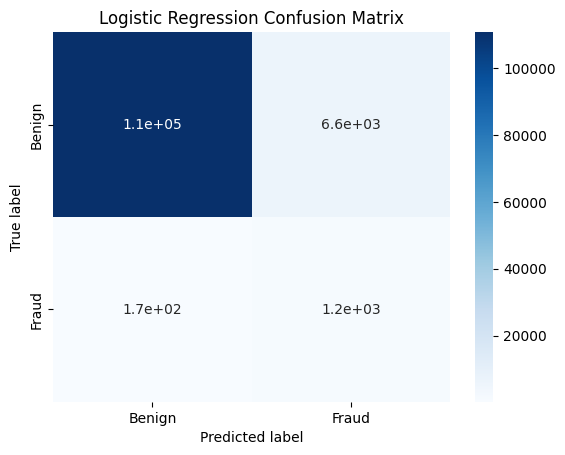

In [40]:
# Model evaluation & Visualisation

y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}%".format(100 * accuracy))
print("\nConfusion Matrix:\n", conf_matrix)

class_names = ["Benign", "Fraud"]
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# **Random Forest Model**

In [41]:
# Build a random forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 99.18%


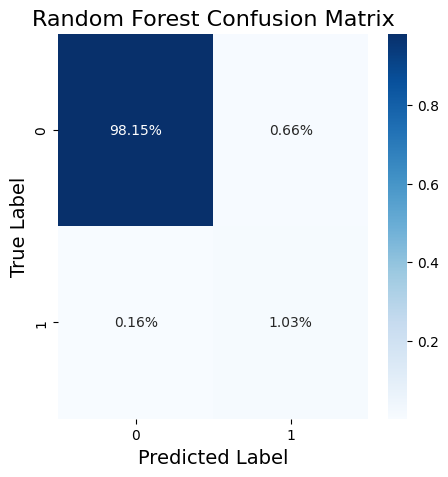

In [42]:
# Model evaluation & Visualisation

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

class_names = ["Benign", "Fraud"]
plt.figure(figsize=(5,5))
plt.title('Random Forest Confusion Matrix', fontsize=16)
sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# **XGBoost Model**

In [43]:
# Build an XGBoost model

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Accuracy: 99.02%


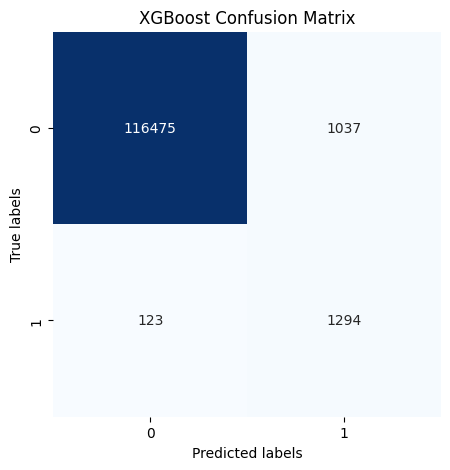

In [44]:
# Model evaluation & Visualisation

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

class_names = ["Benign", "Fraud"]
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGBoost Confusion Matrix')
plt.show()

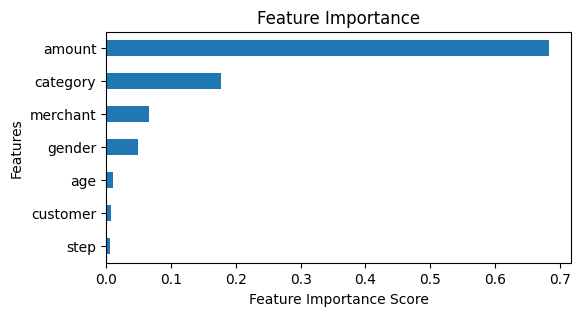

In [45]:
# Find important features

feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,3))
feature_importance.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# **K-Nearest Neighbors Model**

In [46]:
# Build a k-nearest neighbors model

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 97.12%


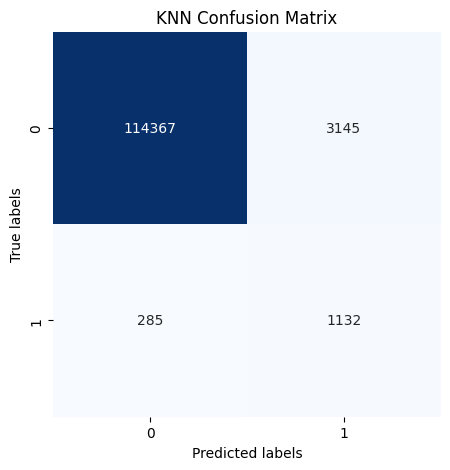

In [47]:
# Model evaluation & Visualisation

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy: %.2f%%" % (accuracy_knn * 100.0))
cm_knn = confusion_matrix(y_test, y_pred_knn)

class_names = ["Benign", "Fraud"]
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN Confusion Matrix')
plt.show()

# **Our Approach (Hybrid Model)**

In [48]:
# Build Our Model

xgb = XGBClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

our_model = VotingClassifier(estimators=[ ('xgb', xgb), ('rf', rf), ('knn', knn)], voting='soft')
our_model.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...x_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

Accuracy: 99.23%


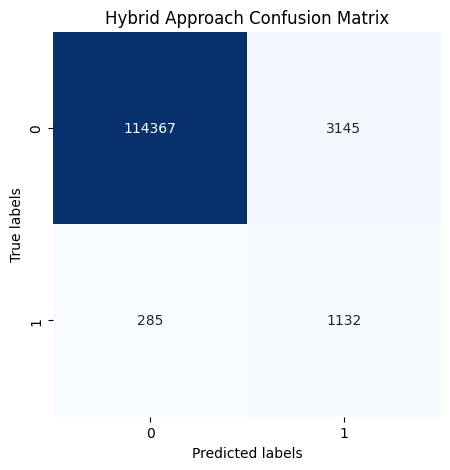

In [49]:
# Model evaluation & Visualisation

y_pred = our_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

class_names = ["Benign", "Fraud"]
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Hybrid Approach Confusion Matrix')
plt.show()

# **Comparison of Models**

In [50]:
# Evaluate the models

print("Deep Learning model accuracy: ", lr_model.score(X_test, y_test)*100)
print("Random Forest model accuracy: ", rf_model.score(X_test, y_test)*100)
print("XGBoost model accuracy: ", xgb_model.score(X_test, y_test)*100)
print("K-Nearest Neighbors model accuracy: ", knn_model.score(X_test, y_test)*100)
print("Our Hybrid model accuracy: ", our_model.score(X_test, y_test)*100)

Deep Learning model accuracy:  94.27053115724507
Random Forest model accuracy:  99.1776606210428
XGBoost model accuracy:  99.02462813947818
K-Nearest Neighbors model accuracy:  97.11592630897427
Our Hybrid model accuracy:  99.22811088969048


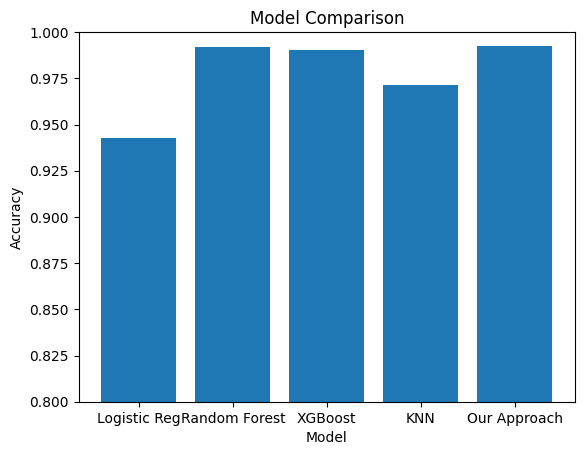

In [51]:
# Visualise Comparison of models

acc = [accuracy_score(y_test, clf.predict(X_test)) for clf in [lr_model, rf_model, xgb_model, knn_model, our_model]]
model_names = ['Logistic Reg', 'Random Forest', 'XGBoost', 'KNN', 'Our Approach']
plt.bar(model_names, acc)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.show()